# 師大機電機構學 CAE 作業

電腦輔助機構分析: 四連桿組，桿2為輸入桿，已知

$$
ω_2 = 100 rpm,\: r_1=6.0,\: r_2=2.0,\: r_3=5.0,\: r_4=5.0, 
$$

使用電腦輔助位置分析試寫一電腦程式分析當 $0 \le θ_2 \le 360$ 時，$θ_3$和$θ_4$的角度變化

Reference: [Machine Dynamics 4 Bar Linkage – GeoGebra](https://www.geogebra.org/m/BueCG9ch)

In [9]:
# 0. 設定參數

omega_2: float = 100.0  # rpm
r1: float = 6.0 # m
r2: float = 2.0 # m
r3: float = 5.0 # m
r4: float = 5.0 # m

# 精度
precision: float = 1e-6

import numpy as np
from numpy import sin, cos, pi, deg2rad, rad2deg
import matplotlib.pyplot as plt

# 1. 設定輸入角速度
omega_2 = 100 * (2 * pi) / 60 # rad/s

# 2. 設定輸入角度
theta_2 = np.linspace(0, 360-1, 360)


In [10]:

# 3. 誤差值

def epsilon_1(theta_2: float, theta_3: float, theta_4: float) -> float:
    return (
          r2 * cos(theta_2)
        + r3 * cos(theta_3)
        - r4 * cos(theta_4)
        - r1
    )

def epsilon_2(theta_2: float, theta_3: float, theta_4: float) -> float:
    return (
          r2 * sin(theta_2)
        + r3 * sin(theta_3)
        - r4 * sin(theta_4)
    )

# 4. 誤差修正值

def delta_theta_3(theta_2: float, theta_3: float, theta_4: float) -> float:
    e1 = epsilon_1(theta_2, theta_3, theta_4)
    e2 = epsilon_2(theta_2, theta_3, theta_4)
    return (
        (e1 * cos(theta_4) + e2 * sin(theta_4))
        / (r3 * sin(theta_3 - theta_4))
    )

def delta_theta_4(theta_2: float, theta_3: float, theta_4: float) -> float:
    e1 = epsilon_1(theta_2, theta_3, theta_4)
    e2 = epsilon_2(theta_2, theta_3, theta_4)
    return (
        (e1 * cos(theta_3) + e2 * sin(theta_3))
        / (r4 * sin(theta_3 - theta_4))
    )

In [11]:

def get_theta_3_and_4(theta_2: float) -> tuple[float, float]:
    t2 = deg2rad(theta_2) # rad
    t3 = deg2rad(66) # rad
    t4 = deg2rad(113) # rad
    # t3 and t4 are arbitrarily initial values
    # t3 - t4 must not be 0 (that is, t3 != t4), else there will be a division by 0 error

    count = 0

    while True:
        count += 1
        e1 = epsilon_1(t2, t3, t4)
        e2 = epsilon_2(t2, t3, t4)
        dt3 = delta_theta_3(t2, t3, t4)
        dt4 = delta_theta_4(t2, t3, t4)
        t3 = (t3 + dt3) % (2 * pi)
        t4 = (t4 + dt4) % (2 * pi)
        count += 1
        if abs(e1) < precision and abs(e2) < precision:
            # print(f"iteration count = {count}")
            # print(f"e1 = {e1}")
            # print(f"e2 = {e2}")
            # print(f"dt3 = {dt3}")
            # print(f"dt4 = {dt4}")
            # print(f"t2 = {t2:.3f} rad or {rad2deg(t2):.3f} deg")
            # print(f"t3 = {t3:.3f} rad or {rad2deg(t3):.3f} deg")
            # print(f"t4 = {t4:.3f} rad or {rad2deg(t4):.3f} deg")
            break
    return (rad2deg(t3), rad2deg(t4))




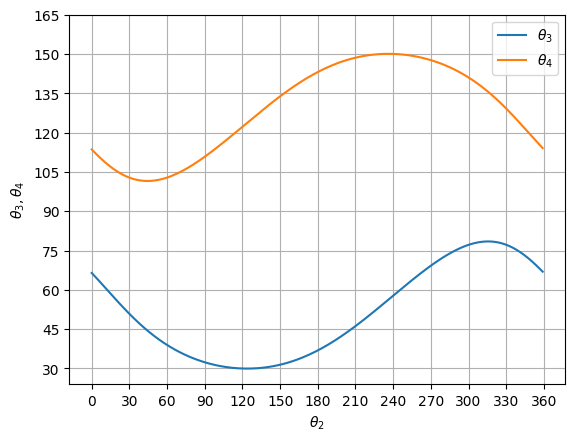

In [14]:
# use numpy to map the function to the array
theta_3 = np.vectorize(get_theta_3_and_4)(theta_2)[0]
theta_4 = np.vectorize(get_theta_3_and_4)(theta_2)[1]

# plot
plt.plot(theta_2, theta_3, label=r"$\theta_3$")
plt.plot(theta_2, theta_4, label=r"$\theta_4$")

# legend
plt.xlabel(r"$\theta_2$")
plt.ylabel(r"$\theta_3, \theta_4$")

# grid
plt.grid()

# ticks
plt.xticks(np.arange(0, 370, 30))
plt.yticks(np.arange(30, 180, 15))

plt.legend()
plt.show()
